In [187]:
import pandas as pd 
import numpy as np
import requests
import time
import json
from datetime import datetime,timedelta
#GET COIN NAME LIST
pages = np.arange(1,116)
tables = []
for i in pages:
    url = 'https://www.coingecko.com/en?page={}'.format(i)
    headers={'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/71.0.3578.98 Safari/537.36'}
    page = requests.get(url, headers=headers)
    page_content = page.content.decode(encoding='utf-8', errors='strict')
    df = pd.read_html(page_content)[0]
    tickers = [i.split()[0].lower() for i in df['Coin']]
    tables += tickers

In [178]:
def stringtodate(string):
    dto = datetime.strptime(string, '%Y-%m-%d')
    return dto
p = []
for i in tables[:2]:
    try:
        previousDate = (datetime.now()-timedelta(days = 365)).strftime("%Y-%m-%d")
        currentDate = datetime.now().strftime("%Y-%m-%d")
        baseUrl = "https://www.coingecko.com/en/coins/{}/historical_data/usd?end_date={}&start_date={}#panel".format(i,currentDate,previousDate)
        page = requests.get(baseUrl, headers=headers)
        page_content = page.content.decode(encoding='utf-8', errors='strict')
        df = pd.read_html(page_content)[0]
        #cleaning Data
        df = df[::-1]
        df['Date'] = [stringtodate(i) for i in df['Date']]
        df.set_index('Date',drop = True, inplace =True)
        df['Close'].iloc[3]
        df[df.columns[1:]] = df[df.columns[1:]].apply(lambda x: x.str.replace('$','')).apply(lambda x: x.str.replace(',','')).astype(float)
    except:
        pass


In [208]:
a = []
for i in tables:
    try:
        previousDate = (datetime.now()-timedelta(days = 365)).strftime("%Y-%m-%d")
        currentDate = datetime.now().strftime("%Y-%m-%d")
        baseUrl = "https://www.coingecko.com/en/coins/{}/historical_data/usd?end_date={}&start_date={}#panel".format(i,currentDate,previousDate)
        page = requests.get(baseUrl, headers=headers)
        page_content = page.content.decode(encoding='utf-8', errors='strict')
        df = pd.read_html(page_content)[0]
        #cleaning Data
        df = df[::-1]
        df['Date'] = [stringtodate(i) for i in df['Date']]
        df.set_index('Date',drop = True, inplace =True)
        df['Close'].iloc[3]
        df[df.columns[1:]] = df[df.columns[1:]].apply(lambda x: x.str.replace('$','')).apply(lambda x: x.str.replace(',','')).astype(float)
        close = df['Close']
        a.append(close)
    except:
        close = 0 

<AxesSubplot:xlabel='Date'>

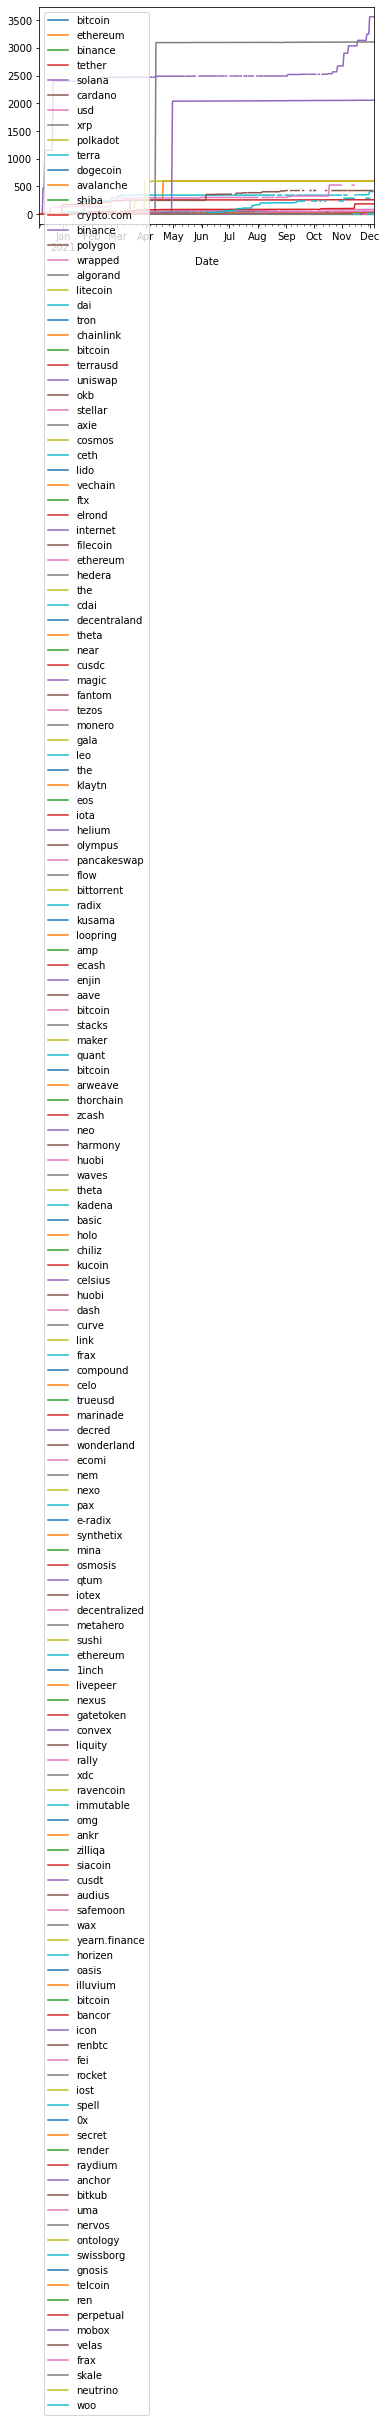

In [310]:
moveMents = [pd.Series(i.pct_change(1).cumsum()) for i in a]


d = pd.DataFrame(moveMents).T

d.columns = tables[:160]

d.plot()